# Clustering

In [39]:
import util
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

conn, cur = util.connexion()

## Etude des corrélations

In [3]:
df = pd.read_sql_query('SELECT titre, public."NbPassagesMC"(titre,current_date), public."NbPassages50"(titre,current_date),	public."NbPassages40"(titre,current_date), public."NbPassages30"(titre,current_date), public."NbPassages20"(titre,current_date), public."NbPassages20k"(titre,current_date) FROM public."Chanson"',con=conn)
df

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
0,Pour la peine,0,1,1,2,1,2
1,Tomber dans ses yeux,0,0,0,0,0,0
2,2 be 3,0,3,0,1,0,3
3,Partir un jour,1,0,3,4,2,2
4,Toujours là pour toi,0,2,0,0,2,0
...,...,...,...,...,...,...,...
2200,À corps perdu,0,0,1,0,0,0
2201,Ces gens-là,0,0,0,1,0,0
2202,Il,0,0,0,0,1,0
2203,Va y avoir du sport,0,0,0,0,1,0


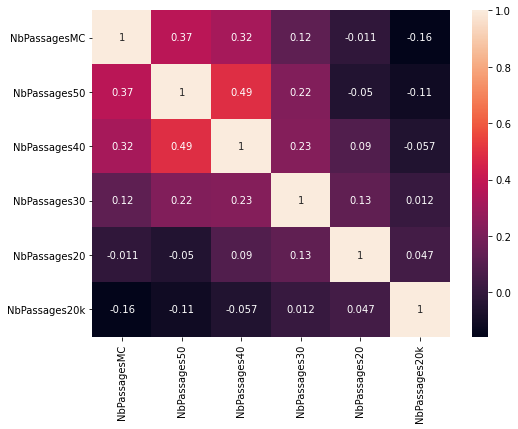

In [4]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Clustering

### KMeans

In [5]:
titres = ['Envole-moi', 'Allumer le feu', 'Évidemment (France Gall)', 'Au fur et à mesure']
df[df['titre'].isin(titres)]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
746,Au fur et à mesure,1,0,1,0,2,1
846,Évidemment (France Gall),3,0,1,1,1,0
907,Envole-moi,2,4,2,0,0,2
954,Allumer le feu,1,4,3,2,0,0


In [6]:
kmeans = KMeans(n_clusters=3).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)


df['cluster'] = kmeans.labels_

for i in range(3):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(15)

[[0.1090604  0.43791946 0.72651007 0.97147651 1.15939597 2.91610738]
 [1.88537549 3.47628458 2.7173913  1.75889328 1.04743083 0.61067194]
 [0.13599275 0.28921124 0.4705349  0.77878513 1.0643699  0.2674524 ]]
Nombre de chansons dans la classe 0 : 596
Nombre de chansons dans la classe 1 : 506
Nombre de chansons dans la classe 2 : 1103


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
218,Quoi,0,0,0,0,1,3,0
563,Kid,0,0,0,1,6,1,2
1898,Ultra moderne solitude,0,0,1,0,0,1,2
2062,C'est chelou,0,0,3,0,1,2,0
1893,Papa mambo,0,0,0,0,1,0,2
1268,Zobi la mouche,0,0,0,0,1,0,2
1144,Ma première biguine partie,0,0,2,0,1,2,0
617,Libérée délivrée,4,3,2,1,1,1,1
778,Toi et moi contre le monde entier,0,1,0,0,1,0,2
316,Le plus beau du quartier,0,0,1,2,1,2,0


In [7]:
n = int(input())

kmeans = KMeans(n_clusters=n).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_



[[0.064764   0.20856202 0.31064764 0.53018661 0.75850714 0.24368825]
 [3.81553398 2.01941748 2.25242718 1.53883495 1.08252427 0.53398058]
 [0.98672566 5.04867257 2.84070796 1.48672566 0.69469027 0.60176991]
 [0.18786127 1.10982659 1.85260116 2.24855491 2.41907514 0.9132948 ]
 [0.06976744 0.40310078 0.5755814  0.80232558 0.94379845 3.01937984]]


In [8]:
for i in range(n):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(20)

Nombre de chansons dans la classe 0 : 911
Nombre de chansons dans la classe 1 : 206
Nombre de chansons dans la classe 2 : 226
Nombre de chansons dans la classe 3 : 346
Nombre de chansons dans la classe 4 : 516


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
417,Saint-Claude,0,1,2,4,2,2,3
792,Nuit,0,0,0,0,1,0,0
580,Confessions nocturnes,0,0,0,1,2,0,0
1886,Jamais content,0,3,1,0,0,3,4
2166,Tu t'en iras,0,0,0,0,1,0,0
1298,Je fais de toi mon essentiel,3,4,2,0,2,0,1
552,Au paradis,0,2,2,1,1,0,3
1618,"Besoin de rien, envie de toi",3,5,2,1,0,0,2
761,Donna donna,0,0,0,1,0,0,0
1428,Nos secrets,0,0,2,3,3,0,3


On détermine dans chaque cluster combien il y a de mêmes chansons, de 20k et de random

In [9]:
for c in range(n):
    total = df[df['cluster']==c]['titre'].count()
    mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
    vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    print("Pour le cluster {0} qui contient {1} chansons".format(c, total))
    print("Nombre de MC : {0}".format(mc))
    print("Nombre de 20k : {0}".format(vingtk))
    print("Nombre de random : {0}".format(reste))
    print()

Pour le cluster 0 qui contient 911 chansons
Nombre de MC : 41
Nombre de 20k : 205
Nombre de random : 665

Pour le cluster 1 qui contient 206 chansons
Nombre de MC : 206
Nombre de 20k : 0
Nombre de random : 0

Pour le cluster 2 qui contient 226 chansons
Nombre de MC : 94
Nombre de 20k : 71
Nombre de random : 61

Pour le cluster 3 qui contient 346 chansons
Nombre de MC : 46
Nombre de 20k : 171
Nombre de random : 129

Pour le cluster 4 qui contient 516 chansons
Nombre de MC : 23
Nombre de 20k : 493
Nombre de random : 0



### Etude des clusters

226


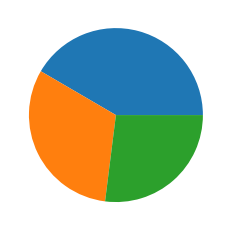

In [10]:
c = int(input())
total = df[df['cluster']==c]['titre'].count()
mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
plt.pie([mc, vingtk, reste])
print(total)
plt.show()

Les mêmes chansons

In [11]:
df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
1134,Toutes les femmes de ta vie,4,5,3,1,0,1,2
1925,Papaoutai,2,6,2,1,0,0,2
155,Dis-moi,4,7,4,1,3,0,2
1038,Il changeait la vie,1,6,3,0,0,0,2
898,Plus près des étoiles,3,5,0,4,1,0,2
192,Celui qui chante,2,4,1,2,0,1,2
1065,Des mots qui résonnent,2,3,4,2,0,1,2
1465,On va s'aimer,1,8,2,1,0,0,2
1794,Les lacs du Connemara,2,4,2,1,0,0,2
1041,Ta marinière,1,3,2,1,1,1,2


Les 20k

In [12]:
df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
986,Noir c'est noir,0,5,0,1,0,1,2
225,Sur ma route,0,5,7,2,0,1,2
370,Chacun fait (c'qui lui plaît),0,5,3,1,1,2,2
597,Prière païenne,0,4,2,0,0,1,2
1706,Dans mon HLM,0,4,1,1,0,1,2
527,Dans les yeux d'Emilie,0,5,2,2,0,1,2
689,Sa raison d'être,0,5,3,3,0,1,2
345,Face à la mer,0,4,1,3,2,1,2
1641,Ça plane pour moi,0,5,4,1,0,1,2
1119,Ma vie au soleil,0,7,1,2,0,1,2


Les random

In [13]:
try:
    df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)
    ok = True
except ValueError:
    print("Il n'y a pas de chansons random dans ce cluster")
    ok = False

df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
117,Vivre ou survivre,0,3,3,2,0,0,2
89,Les comédiens,0,4,2,1,1,0,2
1142,C'est bon pour le moral,0,5,3,0,2,0,2
979,L'envie,0,5,3,1,2,0,2
1317,Les voisines,0,7,4,3,0,0,2
1939,Argent trop cher,0,4,2,2,2,0,2
151,À ma place,0,9,3,1,0,0,2
152,Éteins la lumière,0,7,3,4,0,0,2
1289,Toute seule,0,5,2,1,3,0,2
1707,Dès que le vent soufflera,0,6,5,0,1,0,2


In [14]:
prop = np.array([203, 171, 70, 0, 493])
tot = sum(prop)
prop*100/tot

array([21.66488794, 18.24973319,  7.47065101,  0.        , 52.61472785])

## Insertion des clusters en base

In [40]:
def updateQuery(c, titre):
    titre = titre.replace("'","''")
    return "UPDATE public.\"Chanson\" SET \"clusterID\"= {} WHERE titre = '{}';".format(c, titre)

for row in df.iterrows():
    print(row[1]['titre'], " : ", row[1]['cluster'])
    print(updateQuery(row[1]['cluster'], row[1]['titre']))
    cur.execute(updateQuery(row[1]['cluster'], row[1]['titre']))
    conn.commit()

Pour la peine  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Pour la peine';
Tomber dans ses yeux  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Tomber dans ses yeux';
2 be 3  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = '2 be 3';
Partir un jour  :  3
UPDATE public."Chanson" SET "clusterID"= 3 WHERE titre = 'Partir un jour';
Toujours là pour toi  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Toujours là pour toi';
A caus' des garçons  :  3
UPDATE public."Chanson" SET "clusterID"= 3 WHERE titre = 'A caus'' des garçons';
Ma bataille  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Ma bataille';
C'est ma vie  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'C''est ma vie';
Les filles du bord de mer  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Les filles du bord de mer';
Mes mains sur tes hanches  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Mes mains sur te

In [38]:
cur.execute('SELECT id, titre, "année", id_artiste, nb_mots, "clusterID" FROM public."Chanson"')

InFailedSqlTransaction: ERREUR:  la transaction est annulée, les commandes sont ignorées jusqu'à la fin du bloc
de la transaction
